
# Global Suicide Rates (1985 to 2016)
<div class="alert alert-info">
Close to 800,000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.</div>

<img src = "suicideratesimage.jpg" width=500>

## Aim of Study
<div class="alert alert-info">
The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.</div>

#### Questions to answer
* Is the suicide rate more prominent in some age categories than others?
* Which countries have the most and the least number of suicides?
* What is the effect of the population on suicide rates?
* What is the effect of the GDP of a country on suicide rates?
* What is the trend of suicide rates across all the years?
* Is there a difference between the suicide rates of men and women?

### Method
<div class="alert alert-info">
I will be performing a bivariate analysis, which means that I will try to determine if there is a relationship between two variables in the dataset. There are usually 3 scenarios in bivariate analysis:
1. Two qualitive variables
2. One qualitative and one quantitative variable
3. Two quantitative variables </div>

## Initial Analysis

In [48]:
# Loading relevant libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load the dataset
data=pd.read_csv('suicide-rates.csv')
data.head(6)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


In [50]:
# Descriptive Statistics
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


* There are 27820 rows in the dataset
* The mean number of suicides is found to be around 240 for an average population of 18 lakhs.
* Per 100,000 people, the average suicide number is around 13
* The average HDI and GDP are around 0.78 and 16800 respectively

In [51]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<div class="alert alert-info">These are the columns in the dataframe.</div>

In [52]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

<div class="alert alert-info">There are 3 datatypes in this dataframe- objects, int64, and float64</div>

In [53]:
data.shape

(27820, 12)

<div class="alert alert-info">The dataframe has 27820 rows, as seen previously, and 12 columns.</div>

In [54]:
# Summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


<div class="alert alert-info">The info() function gives a broad overview of the data. There seems to be missing values in the "HDI (Human Development Index) for year" column, as there are only 8364 non-null values. I want to know how many missing values and there, and so:</div>

In [55]:
# Check for number of missing values
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

<div class="alert alert-info">The column has 19456 missing values, which is a lot. They can either be filled up with the correct data, or imputed with the mean of the column. But if the column is not significant, the column can be eliminated during model building (if performed).</div>

In [56]:
# Descriptive Statistics of continuous columns
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


<div class="alert alert-info">There are skewness issues here- the minimum number of suicides is 0, the median is about 25, but the maximum number is about 22000. This indicates a heavy right skew. This distribution calls for a more careful modelling.</div> 

## Data Visualization

In [57]:
# Build a crosstable 
cross_tab = pd.crosstab(index=data["age"], columns='count')
cross_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


<div class="alert alert-info">As this dataset has been curated artificially, the numbers are not an actual representation of the population.</div> 

### Bottom 10 countries with lowest number of suicides

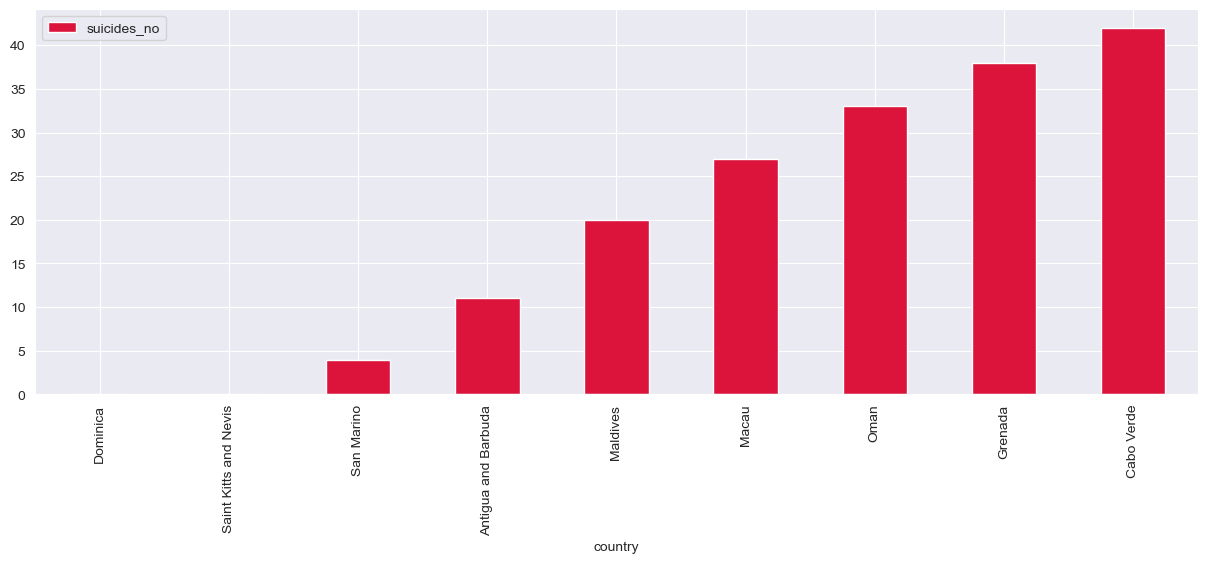

In [102]:
# Bar Plot (numbercial vs categorical)
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(9).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5), color='crimson')

plt.show()

### Top 10 countries with highest number of suicides

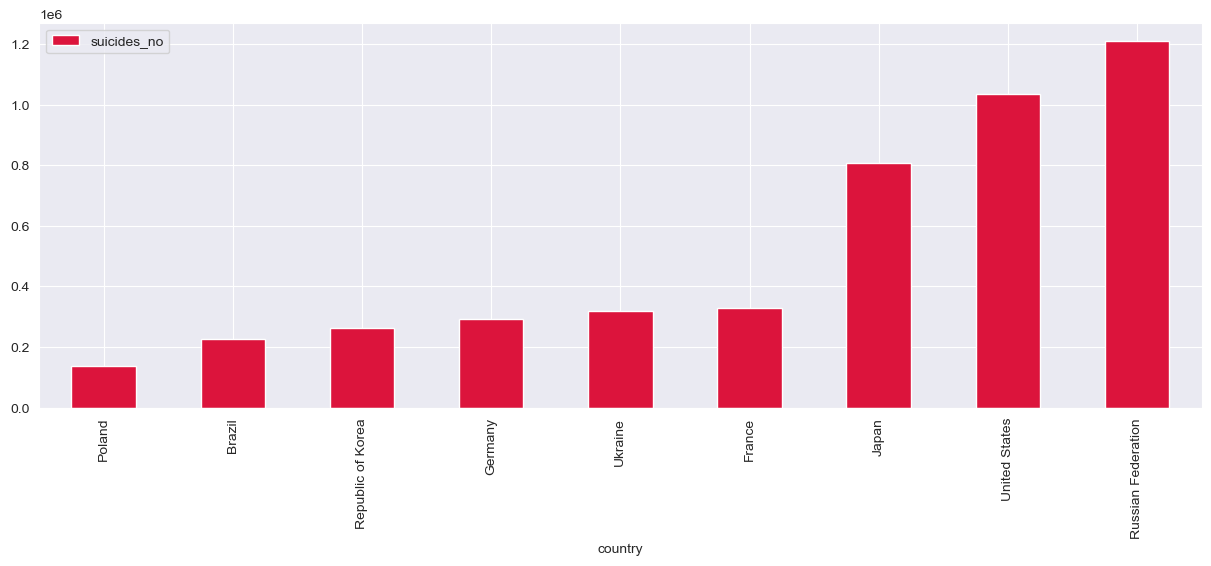

In [103]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).tail(9).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5), color='crimson')

plt.show()

* Russia has the highest number of suicide rates, followed by USA and Japan.
* These 3 countries have an extremely high number of suicides compared to the rest of the world. 

### Number of Suicides vs Age

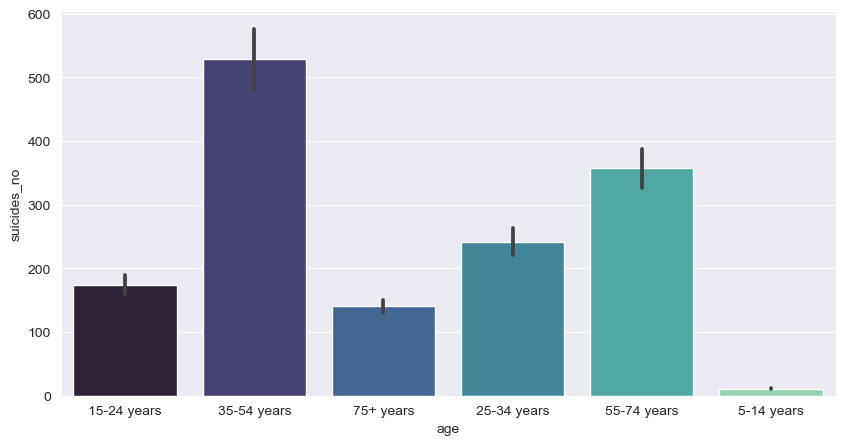

In [93]:
# Bar Plot 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='mako')
plt.show()

<div class="alert alert-info">The lines on the bars indicate the range of variation (variability) around the average. They are called **error bars**. Error bars go beyond simple description to give statistical inferential information and tries to reach significant differences in a bar plot.</div>

### Number of Suicides vs Sex

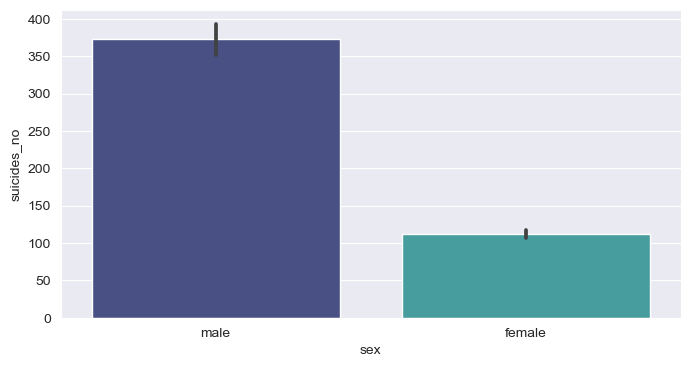

In [92]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=data, palette='mako')
plt.show()

<div class="alert alert-info">Based on the size of the error bar, there seems to be significantly more suicides among men than among women.</div>

### Number of Suicides vs Generation

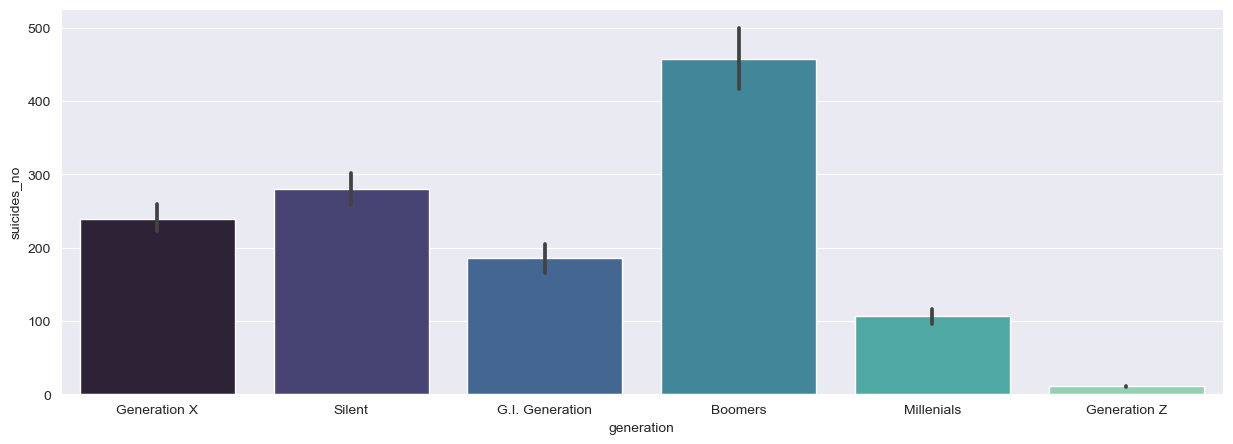

In [91]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='generation', y='suicides_no', data=data, palette='mako')

* The suicide rate is super high for Boomers (people born after WW II)
* Gen Z has the lowest rate, and millenials come second

### Number of Suicides vs Population

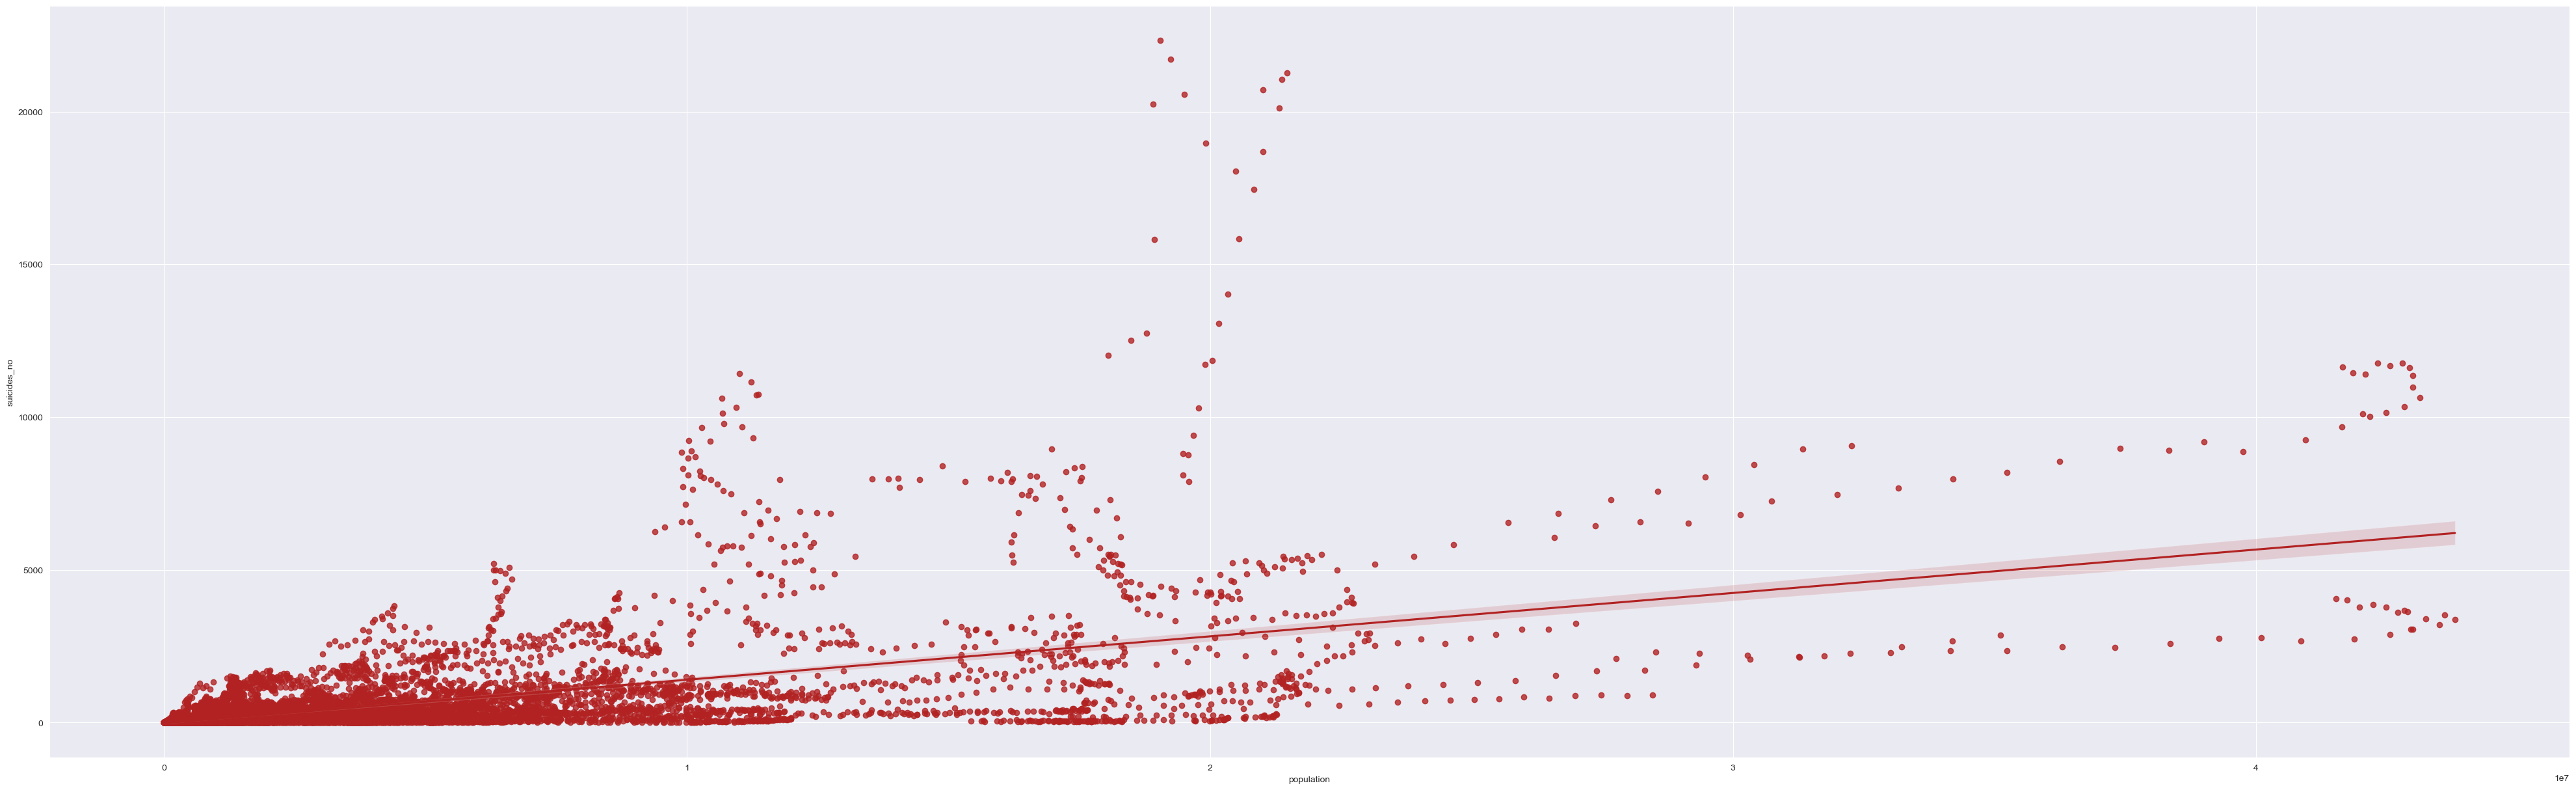

In [84]:
# Scatter Plot with a Regression Line
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='population',y='suicides_no', data=data, color='firebrick')

<div class="alert alert-info">Generally larger countries should be having higher suicide rates, which does kind of seem to be the case. But there seems to be an anomaly where the countries with population of about 100000-200000 have higher rates, which deviate from the trend line.</div>  

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

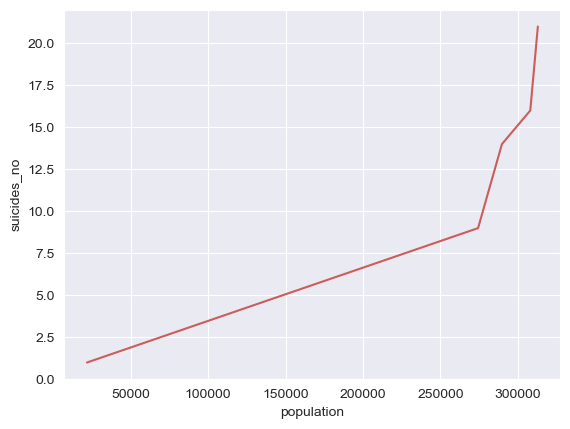

In [85]:
# Line Plot
sns.lineplot(x='population',y='suicides_no', data=data.head(), color='indianred')

<div class="alert alert-info">This is just another way of representing a plot of two of the same numerical variables.</div> 

### Number of Suicides/100k Population Vs GDP Per Capita

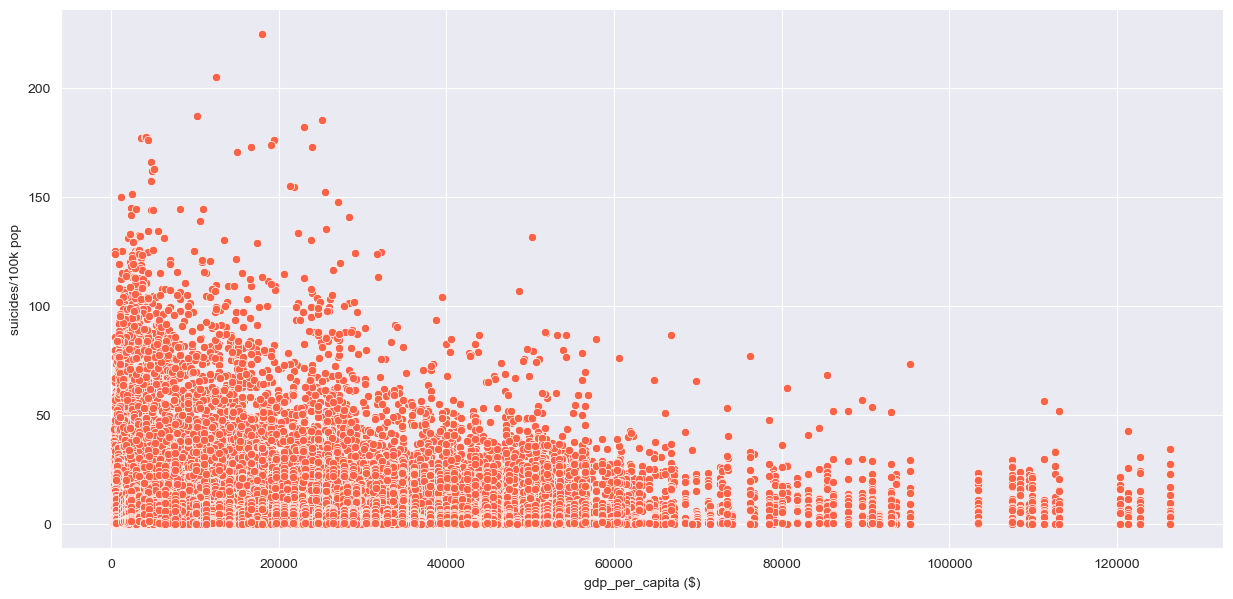

In [86]:
# Scatter Plot
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data, color='tomato') 
plt.show()

<div class="alert alert-info">What is the relationship between suicides and the wealth of a country? Are economic circumstances of people a good predictor of suicide rates? If we want to remove the conditions of suicide, does wealth matter? 

There is more to the cause of suicide rates than just the wealth of a country, but there does appear to be some correlation here- wealthier countries generally have lower suicide rates. 

A correlation matrix or a heatmap would provide better insights into the correlations between all the variables in the dataset.</div>

### Correlation Between Pairs of Continuous Variables - Heat Map

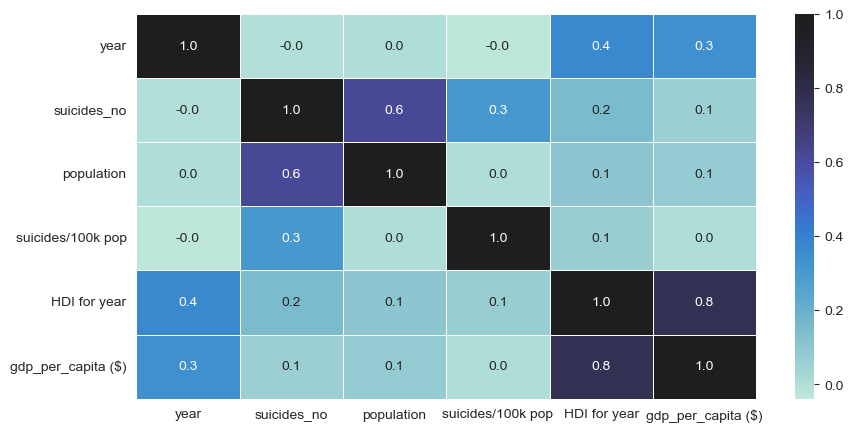

In [89]:
# Heat Map
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1)
plt.show()

<div class="alert alert-info">There seems to be a very high correlation between HDI and GDP. 
There is a high correlation between population of a country and their GDP. 
The GDP and suicide rates correlation is only about 0.1. 

There are correlations between variables here. Occasionally they are strong, and occasionally they are weak.</div>

### Number of Suicides by Sex and Age

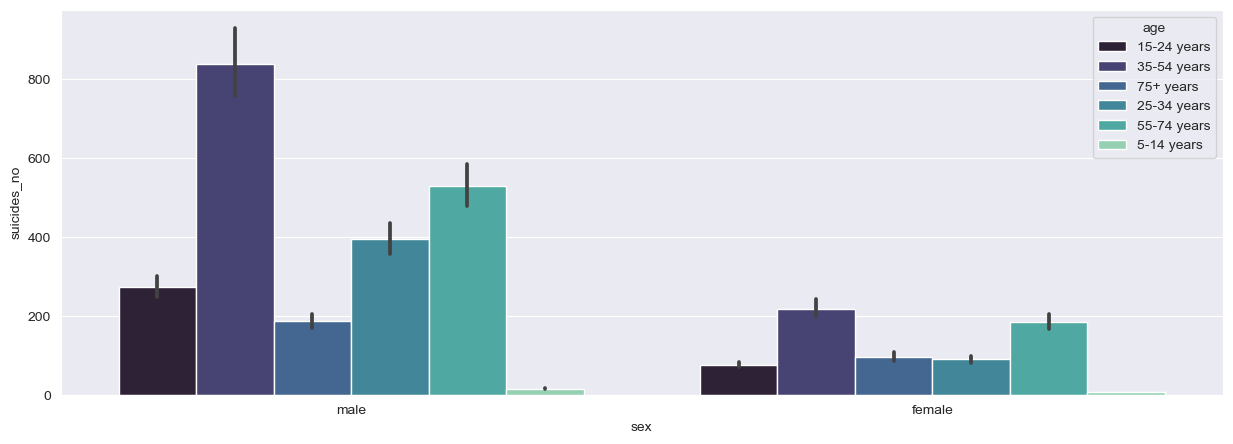

In [90]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='age', palette='mako')
plt.show()

### Number of suicides by Sex and Generation

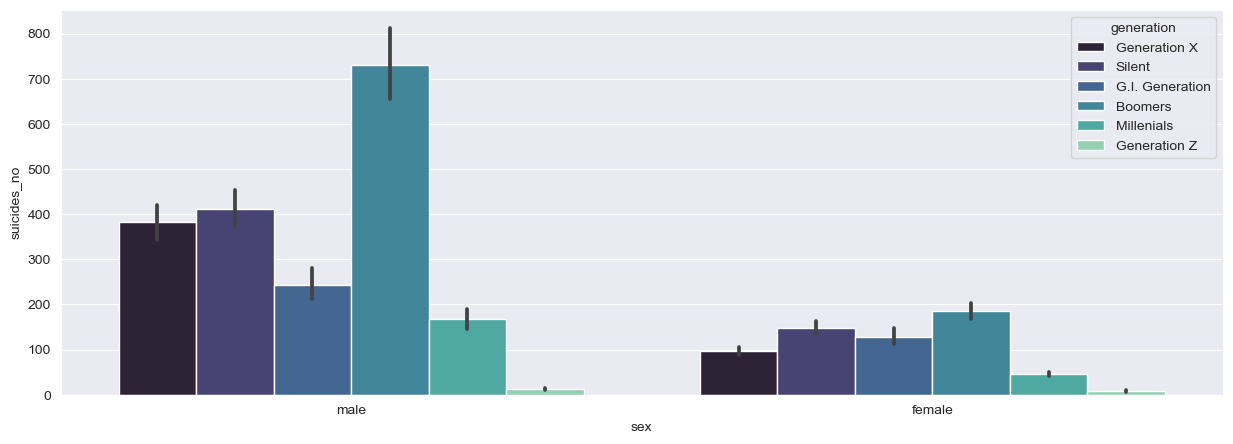

In [94]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='generation', palette='mako')
plt.show()

<div class="alert alert-info">Baby Boomers have a higher suicide rate overall. In men, they show a significant difference in number, whereas in women, the number is not that drastically high. Hence, there is an association with gender, generation, and suicide rates.</div> 

### Number of Suicides: Country vs Sex

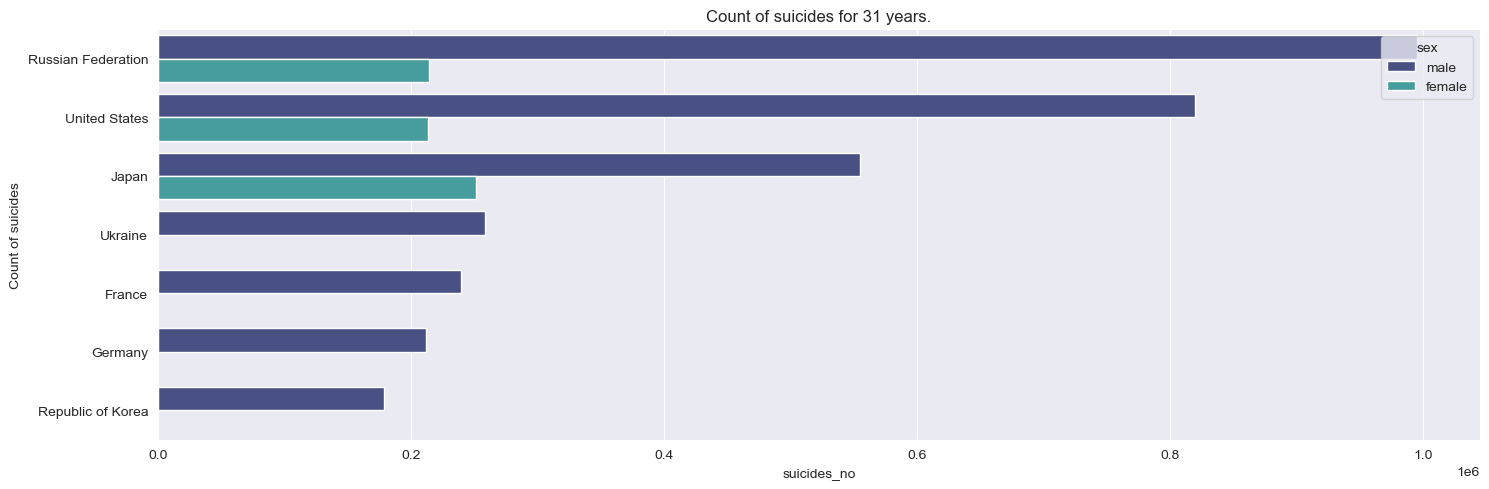

In [97]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()  
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False) 
most_cont_m = suic_sum_m.head(10) 

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country',x='suicides_no',hue='sex',data=most_cont_m,palette='mako');

plt.ylabel('Count of suicides')
plt.tight_layout()

<div class="alert alert-info">This is a horizontal bar plot. The suicide rate for women is stable across countries, whereas for men the rate has higher variance.</div> 

## Average Number of Suicides Across Each Generation for a Given Gender

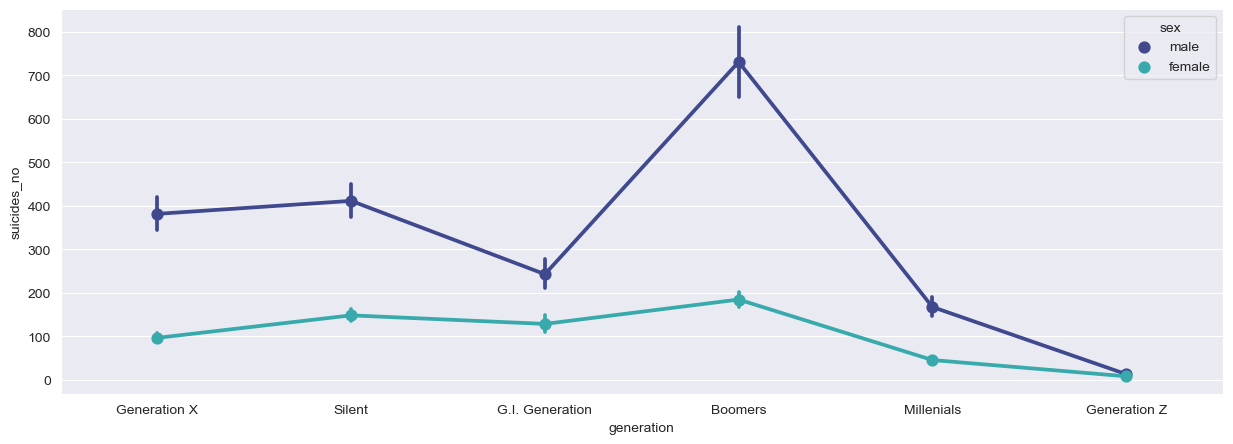

In [98]:
# Point Plot
plt.figure(figsize=(15,5))

sns.pointplot(x="generation", y="suicides_no", hue = 'sex',  data=data, palette='mako')
plt.show()

<div class="alert alert-info">For Boomers, there seems to be a large difference in suicide rates between men and women compared to other generations. For Gen Z, the sex has almost no influence over suicide rates.</div> 

### Population Distribution Across Each Generation

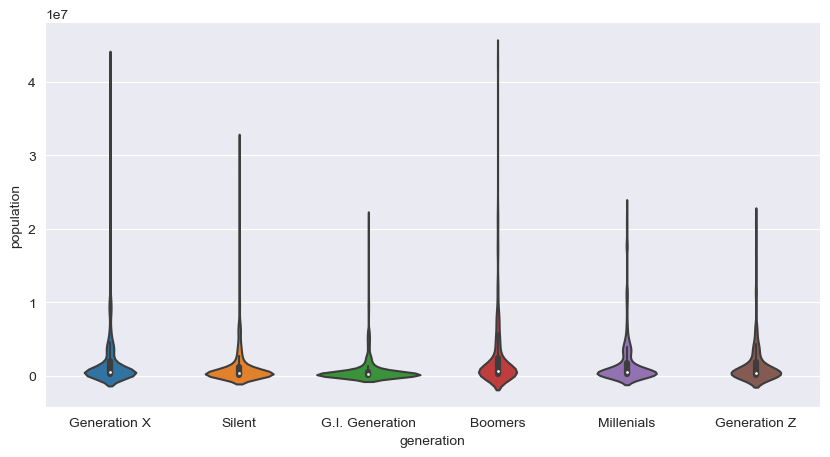

In [101]:
# Violin Plot
plt.figure(figsize=(10,5))
sns.violinplot(x=data.generation, y=data['population'])
plt.show()

<div class="alert alert-info">This plot shows symmetry and density estimates using kernel methods. It shows that the population of boomers is more widely spread relative to Gen X.</div> 

### Suicide Rates vs Years

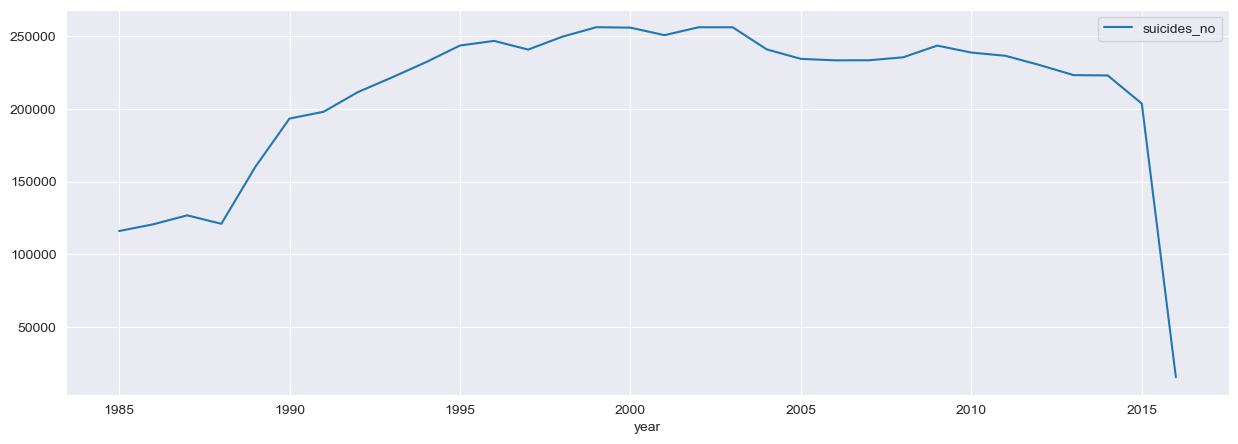

In [72]:
# Trend Plot
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

<div class="alert alert-info">Temporal data is data that represents a state in time. This state is captured by a variable which is usually depicted in the y-axis. 

As time went by, what happened to suicide rates? The suicides rates were slowly increasing until the turn of the millenium,and then have been going down gradually before showing a sharp drop in the 2010s.The drops could be misleading sometimes if the data has not been collected for the entire year. Perhaps that is what is going on here.</div> 

### Population vs Years

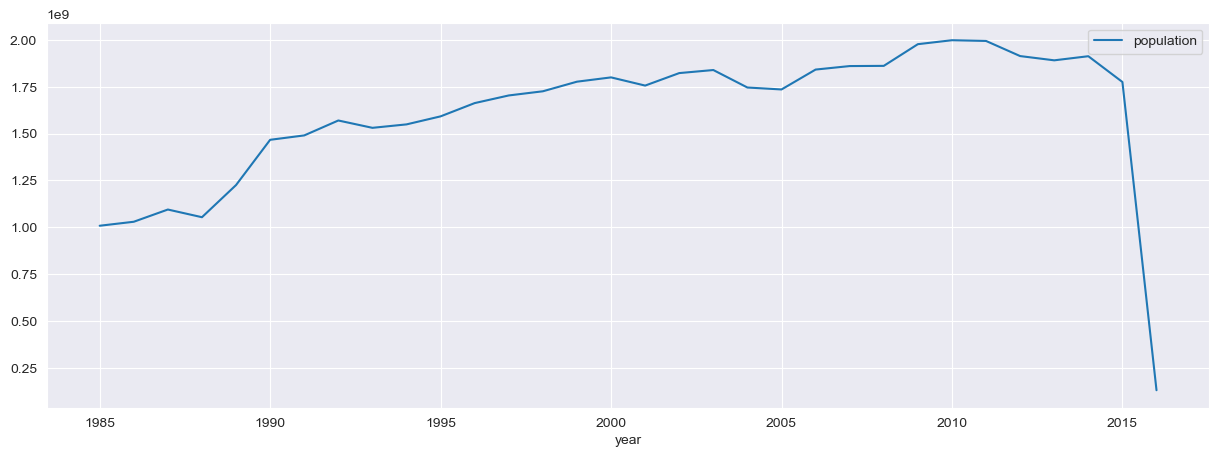

In [73]:
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

<div class="alert alert-info">The population shows a similar kind of increase, but does not have the downward trend that was captured in the previous graph. This kind of a ratio analysis would help.</div> 

### Suicides per 100k Population vs Years

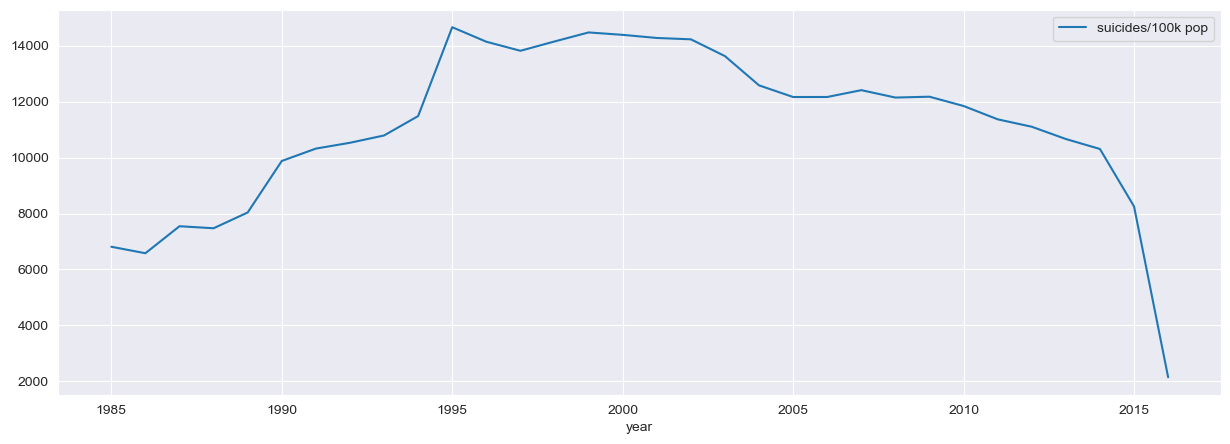

In [74]:
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

<div class="alert alert-info">This graph has a sharper downward trend as the total number of suicides has gone down slightly, while the population has gone up.</div>

This is the end of my analysis. I have performed an extensive Exploratory Data Analysis to understand suicide rates within the given time period. 

# The End